<a href="https://www.kaggle.com/code/abhaykhamkar37/zomato-eda-abhay-khamkar?scriptVersionId=138749098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df = pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


checking important column and droping unwanted column

In [3]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [5]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [6]:
df.drop(columns=['url','listed_in(city)','phone','menu_item','reviews_list','address','dish_liked'],inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [7]:
df.iloc[:,1]

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

rename column

In [8]:
df.rename(columns={'name':'Restaurant Name','online_order':'Online Order','book_table':'Book Table','rate':'Rating','votes':'Votes','dish_liked':'Most Dish Liked','location':'Location','rest_type':'Restaurant Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost For Two People','listed_in(type)':'Type'},inplace=True)

In [9]:
df

,Restaurant Name,Online Order,Book Table,Rating,Votes,Location,Restaurant Type,Cuisines,Cost For Two People,Type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


cleaning individual column from dataframe

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35011 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant Name      35011 non-null  object
 1   Online Order         35011 non-null  object
 2   Book Table           35011 non-null  object
 3   Rating               31241 non-null  object
 4   Votes                35011 non-null  int64 
 5   Location             34997 non-null  object
 6   Restaurant Type      34855 non-null  object
 7   Cuisines             34978 non-null  object
 8   Cost For Two People  34790 non-null  object
 9   Type                 35011 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [12]:
df.isnull().sum()

Restaurant Name           0
Online Order              0
Book Table                0
Rating                 3770
Votes                     0
Location                 14
Restaurant Type         156
Cuisines                 33
Cost For Two People     221
Type                      0
dtype: int64

In [13]:
df.shape

(35011, 10)

cleaning Rating column

In [14]:
df['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
df['Rating']=df['Rating'].replace(['NEW','-'],0.0)
df['Rating']=df['Rating'].str.replace('/5','')
df['Rating'] = df['Rating'].astype(float)
df['Rating'].fillna(0.0,inplace=True)

In [16]:
df['Rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

cleaning Restaurant Name column

In [17]:
df['Restaurant Name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [18]:
df['Restaurant Name']= df['Restaurant Name'].str.replace("[Ã|Â][^\d]",'',regex = True)
df['Restaurant Name']= df['Restaurant Name'].str.replace("?","'",regex = True)
df['Restaurant Name']= df['Restaurant Name'].str.replace("@",' at ',regex = True)

In [19]:
df['Restaurant Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

cleaning 'Location' column

In [20]:
df['Location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [21]:
df=df.drop(df[df['Location'].isnull()].index)
df

,Restaurant Name,Online Order,Book Table,Rating,Votes,Location,Restaurant Type,Cuisines,Cost For Two People,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [22]:
df[df['Location'].isnull()]

,Restaurant Name,Online Order,Book Table,Rating,Votes,Location,Restaurant Type,Cuisines,Cost For Two People,Type


cleaning 'Cuisines' column

In [23]:
df['Cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [24]:
df=df.drop(df[df['Cuisines'].isnull()].index)

In [25]:
df[df['Cuisines'].isnull()]

,Restaurant Name,Online Order,Book Table,Rating,Votes,Location,Restaurant Type,Cuisines,Cost For Two People,Type


cleaning 'Cost For Two People' column

In [26]:
df['Cost For Two People'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [27]:
df['Cost For Two People']=df['Cost For Two People'].str.replace(',','')
df['Cost For Two People']=df['Cost For Two People'].replace(np.nan,'0')
df['Cost For Two People']=(df['Cost For Two People']).astype(int)

In [28]:
df[(df['Cost For Two People'].isnull())]

,Restaurant Name,Online Order,Book Table,Rating,Votes,Location,Restaurant Type,Cuisines,Cost For Two People,Type


In [29]:
df.isnull().sum()

Restaurant Name          0
Online Order             0
Book Table               0
Rating                   0
Votes                    0
Location                 0
Restaurant Type        142
Cuisines                 0
Cost For Two People      0
Type                     0
dtype: int64

In [30]:
# df.drop(df[(df['Location'].isnull())],inplace=True,axis=0)
# df['Location']=df['Location'].dropna()

In [31]:
# df = df.drop(index=)

cleaning 'Restaurent Type' column

In [32]:
df[df['Restaurant Type'].isnull()]

,Restaurant Name,Online Order,Book Table,Rating,Votes,Location,Restaurant Type,Cuisines,Cost For Two People,Type
999,Mughlai Kitchen,Yes,No,3.5,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
1300,Eat & Joy Restaurant,Yes,No,3.0,7,JP Nagar,NaN,"Fast Food, Finger Food",300,Delivery
1376,Kababish Restaurant,Yes,No,3.6,15,BTM,NaN,"North Indian, Chinese, Arabian",700,Delivery
1565,Goli Vada Pav No 1,No,No,0.0,0,Bannerghatta Road,NaN,"Street Food, Burger",150,Delivery
1637,Ammi's Biryani,No,No,2.4,392,Bannerghatta Road,NaN,"Biryani, North Indian",500,Delivery
...,...,...,...,...,...,...,...,...,...,...
50838,Vijayawada Heights,Yes,No,3.2,8,Whitefield,NaN,North Indian,600,Delivery
50978,Snack Itt,No,No,0.0,0,Whitefield,NaN,Bakery,200,Desserts
51130,Pindi Bangalore,Yes,No,0.0,0,Whitefield,NaN,"North Indian, Chinese, Biryani, Street Food",900,Dine-out
51195,Special Biryani House,Yes,No,3.2,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400,Dine-out


In [33]:
df['Restaurant Type'].fillna(df.loc[df['Restaurant Type'].isnull(),'Type'],inplace=True)

In [34]:
df['Restaurant Type'] = df['Restaurant Type'].str.replace('Dine-out','Casual Dining')

In [35]:
df.isnull().sum()

Restaurant Name        0
Online Order           0
Book Table             0
Rating                 0
Votes                  0
Location               0
Restaurant Type        0
Cuisines               0
Cost For Two People    0
Type                   0
dtype: int64

datavisualization part

In [36]:
df.reset_index()
# p=df.groupby('Restaurant Name').agg({'Type':'value_counts'})

# p1=[]
# for i in p.index:
#     p1.append(i[0])
# p['index']=p1

,index,Restaurant Name,Online Order,Book Table,Rating,Votes,Location,Restaurant Type,Cuisines,Cost For Two People,Type
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
34973,51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars
34974,51713,Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,Finger Food,600,Pubs and bars
34975,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,Whitefield,Bar,Finger Food,2000,Pubs and bars
34976,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars


In [37]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Online Order', ylabel='count'>

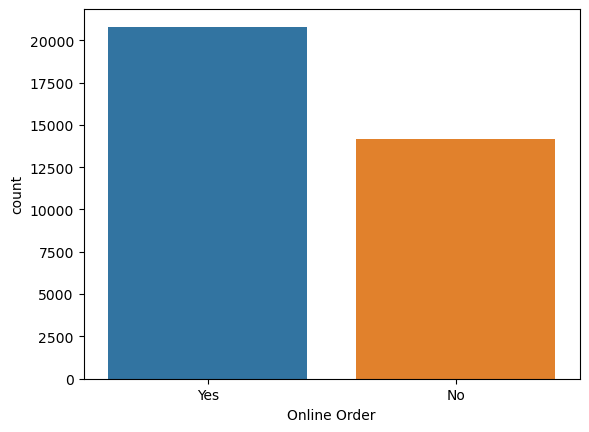

In [38]:
sns.countplot(x='Online Order', data=df)

<AxesSubplot:xlabel='Book Table', ylabel='count'>

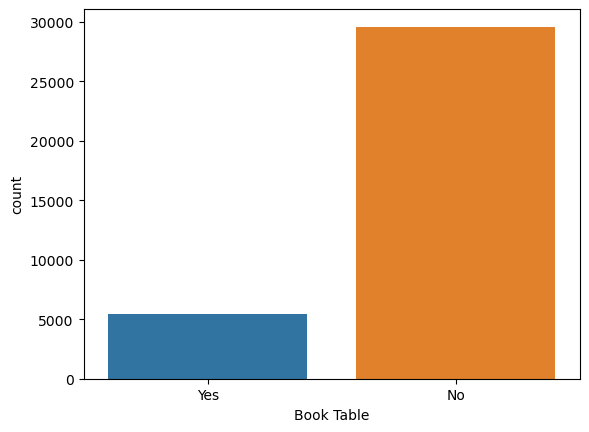

In [39]:
sns.countplot(x='Book Table', data=df)

<AxesSubplot:xlabel='Book Table', ylabel='Rating'>

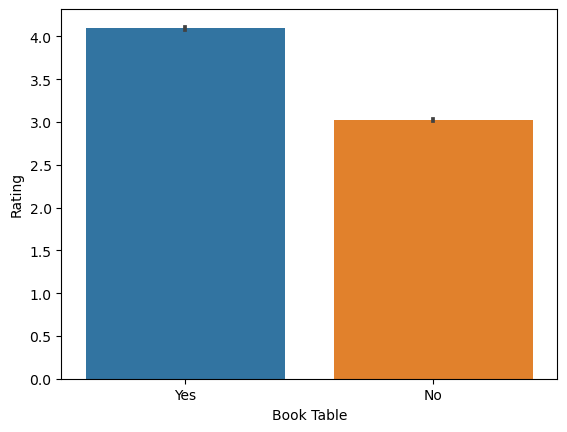

In [40]:
sns.barplot(x='Book Table',y='Rating',data=df)

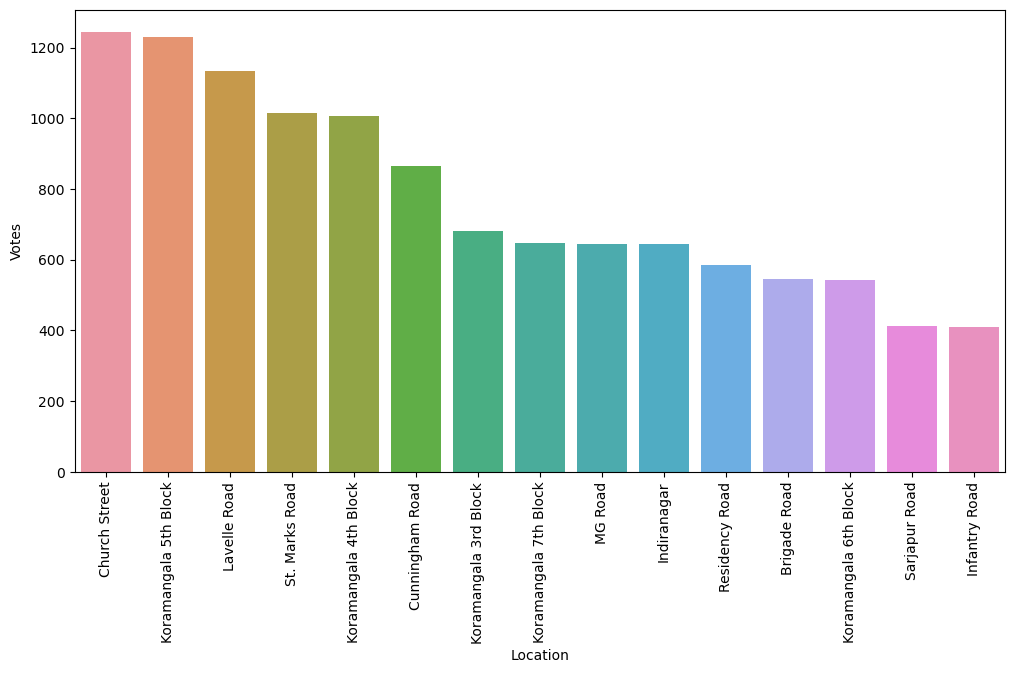

In [41]:
grouping = df.groupby('Location').agg({'Rating':'mean','Votes':'mean'})
top_votes = grouping.nlargest(15,'Votes')
plt.figure(figsize=(12,6))
sns.barplot(x='Location',y='Votes',data=top_votes.reset_index());
plt.xticks(rotation=90);

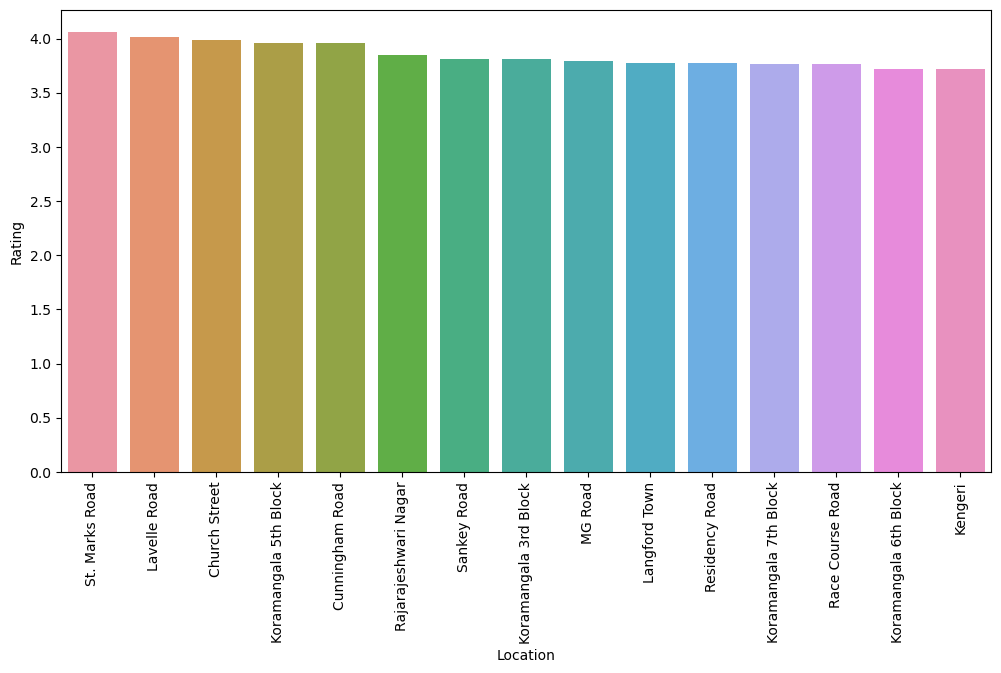

In [42]:
top_ratings = grouping.nlargest(15,'Rating')
plt.figure(figsize=(12,6))
sns.barplot(x='Location',y='Rating',data=top_ratings.reset_index());
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Restaurant Type', ylabel='Restaurant Name'>

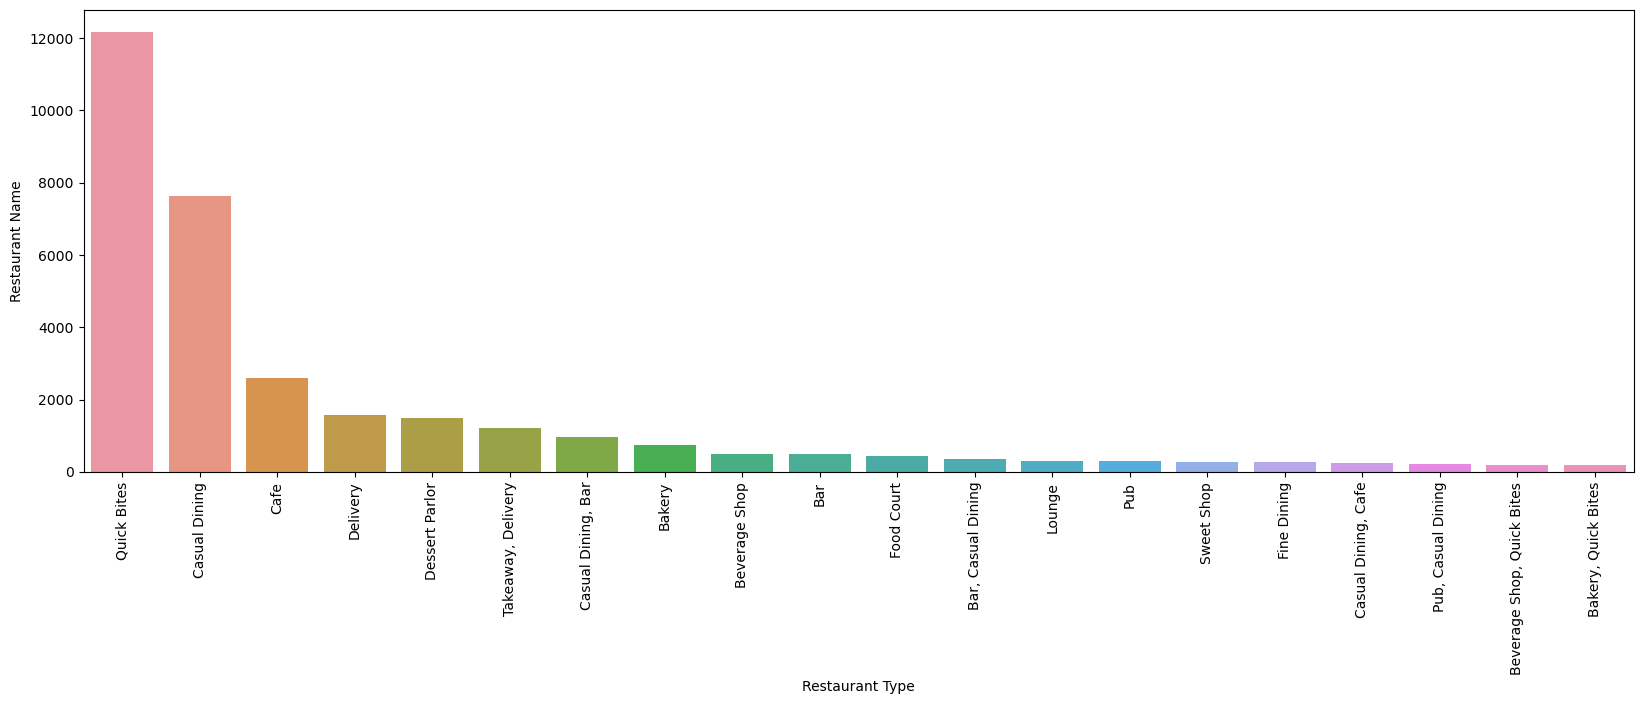

In [43]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90);
a=df.groupby('Restaurant Type')[['Restaurant Name']].count().nlargest(20,['Restaurant Name']).reset_index()
sns.barplot(x='Restaurant Type',y='Restaurant Name', data=a)

<AxesSubplot:xlabel='Restaurant Type', ylabel='Rating'>

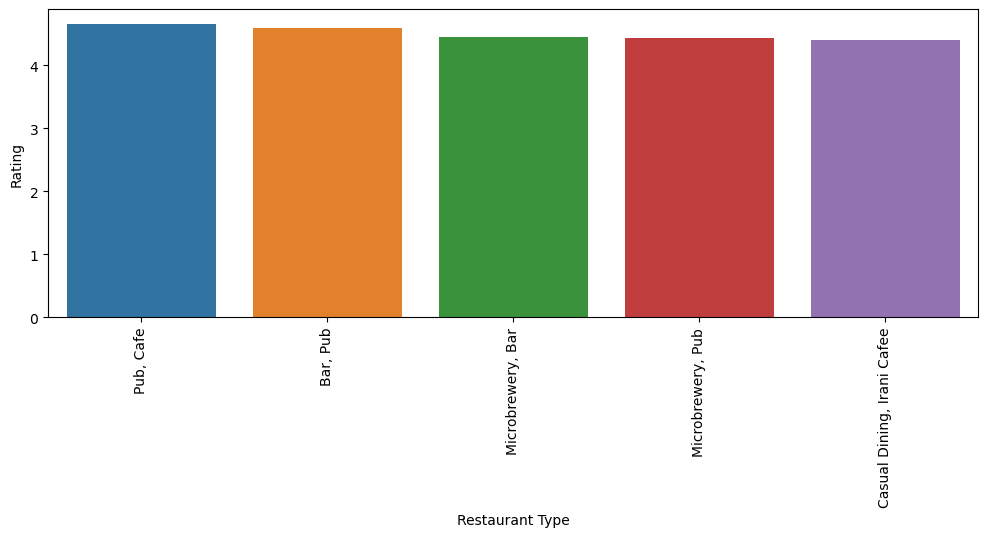

In [44]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90);
b=df.groupby('Restaurant Type')[['Rating']].mean().nlargest(5,['Rating']).reset_index()
sns.barplot(x='Restaurant Type',y='Rating', data=b)

<AxesSubplot:xlabel='count'>

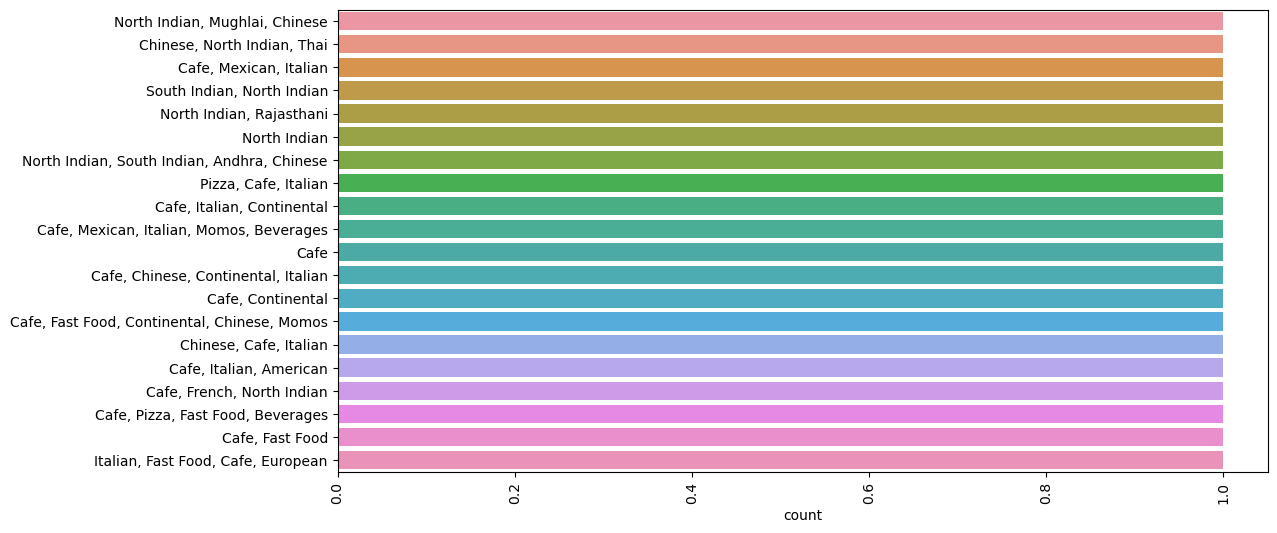

In [45]:
Types_of_Services = df['Cuisines'].unique()
plt.figure(figsize=(12,6))
plt.xticks(rotation=90);
sns.countplot(y=Types_of_Services[0:20])

In [46]:
Types_of_Services = df['Cuisines'].unique()
Types_of_Services[0:5]

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', 'South Indian, North Indian',
       'North Indian, Rajasthani'], dtype=object)

<AxesSubplot:xlabel='Type', ylabel='Rating'>

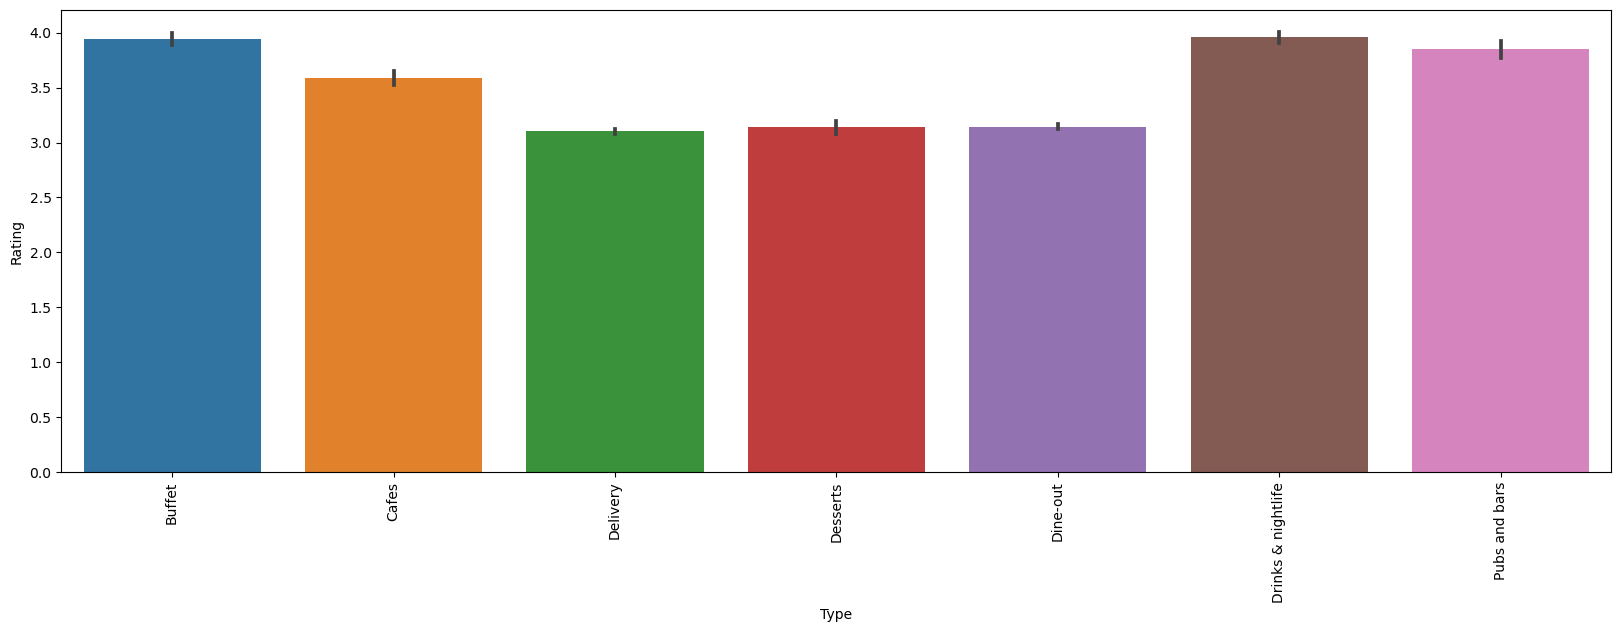

In [47]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90);
sns.barplot(x='Type',y='Rating', data=df)

<AxesSubplot:xlabel='Type', ylabel='Cost For Two People'>

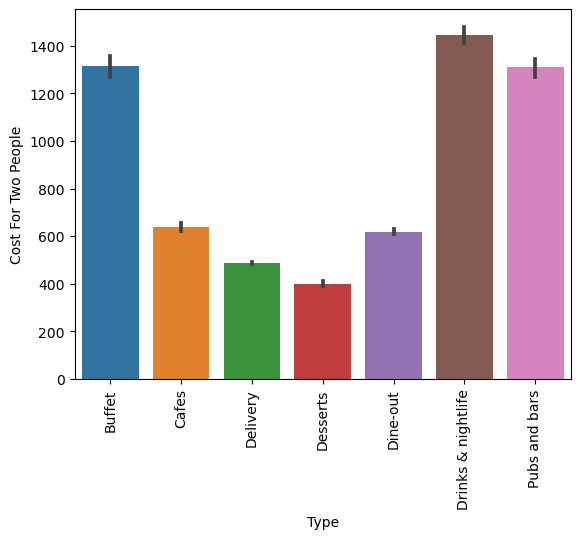

In [48]:
plt.xticks(rotation=90)
sns.barplot(x='Type',y='Cost For Two People',data=df)

In [49]:
x=df['Location'].unique()


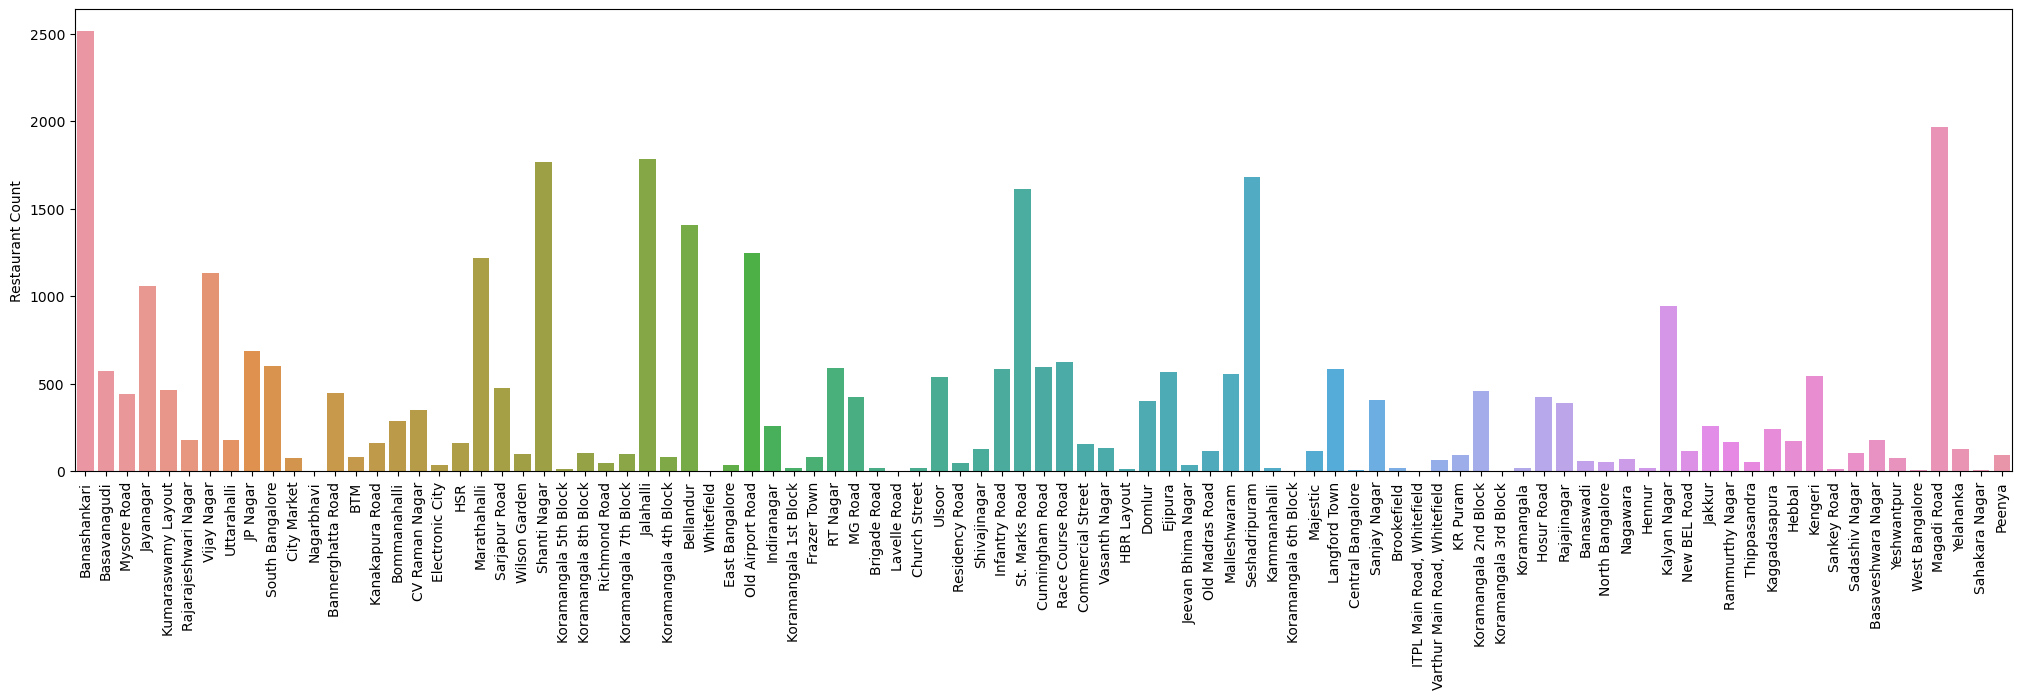

In [50]:
plt.figure(figsize=(25,6))
y=df.groupby(['Location'])['Restaurant Name'].agg('count')
# plt.xlabel("Restaurant Count")
plt.xticks(rotation=90)

# plt.set_y
# plt.bar(y, height=1)
sns.barplot(x=x,y=y)
plt.ylabel("Restaurant Count")
plt.show()

In [51]:
y=df.groupby(['Location'])['Restaurant Name'].agg('count')

<AxesSubplot:ylabel='count'>

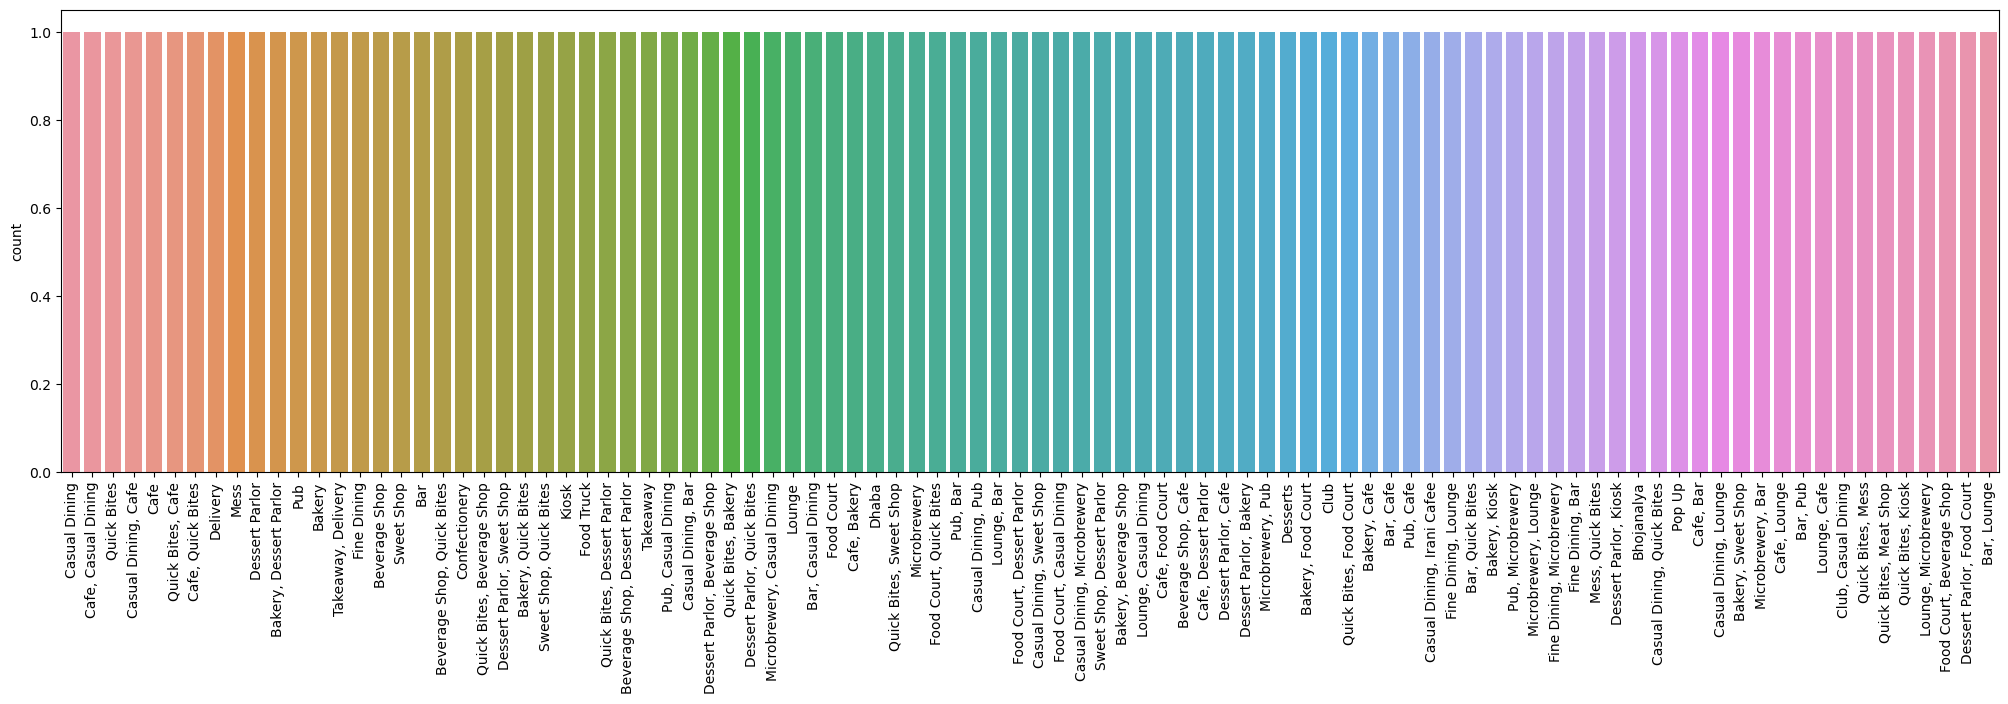

In [52]:
plt.figure(figsize=(25,6))
plt.xticks(rotation=90)
d=df['Restaurant Type'].unique()
sns.countplot(x=d,data=df)

In [53]:
B=df[df['Location'].str.contains('North Bangalore')|df['Location'].str.contains('West Bangalore')]

<AxesSubplot:xlabel='Restaurant Name', ylabel='count'>

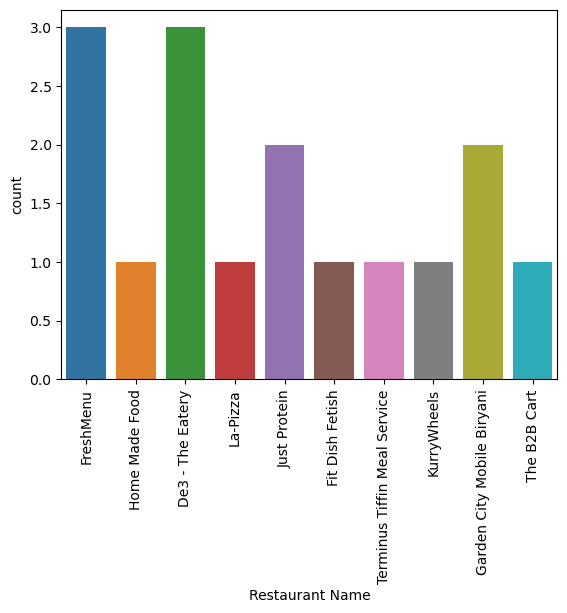

In [54]:
B['Restaurant Name']
plt.xticks(rotation=90)
sns.countplot(x=B['Restaurant Name'])